##### 광고 제거
- 크롤링 파일 로드

In [95]:
from tqdm import tqdm
tqdm.pandas()
#data['doc']=data['doc'].progress_apply(lambda x : clean_text(x))

In [96]:
import pandas as pd
import numpy as np

#크롤링 데이터 불러오기
#본인이 크롤링한 파일 업로드
data=pd.read_csv('블로그_비건.csv', encoding='utf-8-sig')
data

,Unnamed: 0,time,review,comment,like,url
0,0,2021. 2. 9. 16:12,먹어본 리뷰 [하이 프로틴] 식물성단백질 음료 추천:: 깔끔한...,[],5,https://blog.naver.com/yh4rangs/222237888002
1,1,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737
2,2,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869
3,3,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...
4,4,2022. 6. 24. 23:51,비건빵지순례 성북구 비건빵 비건카페 패밀리앤프렌즈 ...,[],9,https://blog.naver.com/deli_et/222787679092
...,...,...,...,...,...,...
1505,1505,2022. 4. 1. 11:39,업계 트랜드 분석 '22.4.1(금) F&B 뉴스 클리핑 ...,[],4,https://blog.naver.com/pulmuonefnc/222688754395
1506,1506,2022. 4. 26. 17:10,♧계란아 뭐하니?♧ 널담 병아리콩 스낵<비건 푸드> ...,[],19,https://blog.naver.com/aablack/222712249314
1507,1507,2021. 3. 6. 17:05,카페 거제카페추천 : 프릴메이 : 아주동카페 : 비건빵집 ...,[],8,https://blog.naver.com/h_yuri931017/222266408609
1508,1508,2022. 3. 17. 12:02,리뷰리뷰~~~ 건강한 주말브런치 어나더밀브레드 유기농호밀빵 으...,[],4,https://blog.naver.com/isis0905/222675164753


In [97]:
#필요없는 컬럼 삭제
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time     1510 non-null   object
 1   review   1510 non-null   object
 2   comment  1510 non-null   object
 3   like     1510 non-null   object
 4   url      1510 non-null   object
dtypes: object(5)
memory usage: 59.1+ KB


In [98]:
data

,time,review,comment,like,url
0,2021. 2. 9. 16:12,먹어본 리뷰 [하이 프로틴] 식물성단백질 음료 추천:: 깔끔한...,[],5,https://blog.naver.com/yh4rangs/222237888002
1,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737
2,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869
3,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...
4,2022. 6. 24. 23:51,비건빵지순례 성북구 비건빵 비건카페 패밀리앤프렌즈 ...,[],9,https://blog.naver.com/deli_et/222787679092
...,...,...,...,...,...
1505,2022. 4. 1. 11:39,업계 트랜드 분석 '22.4.1(금) F&B 뉴스 클리핑 ...,[],4,https://blog.naver.com/pulmuonefnc/222688754395
1506,2022. 4. 26. 17:10,♧계란아 뭐하니?♧ 널담 병아리콩 스낵<비건 푸드> ...,[],19,https://blog.naver.com/aablack/222712249314
1507,2021. 3. 6. 17:05,카페 거제카페추천 : 프릴메이 : 아주동카페 : 비건빵집 ...,[],8,https://blog.naver.com/h_yuri931017/222266408609
1508,2022. 3. 17. 12:02,리뷰리뷰~~~ 건강한 주말브런치 어나더밀브레드 유기농호밀빵 으...,[],4,https://blog.naver.com/isis0905/222675164753


##### 광고글의 특징
- 1.특정 단어를 포함한 게시글: "제공받아", "지원받아", "해당업체" 등등
- 2.(네이버 블로그 특징) 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건에 해당하여 광고로 볼 수 있음

1번 특징 제거
- 광고글 특징을 stopwords로 지정하여 해당 글은 삭제할 수 있도록 한다.
- 분석가 판단 하에 추가 광고 문구를 확인하여 stopwords 리스트에 추가해준다.

In [99]:
Stopwords = ["제공받아", "제공받았", "지원받아", "지원받았", "해당업체", "해당업체",
            "해시태그", "협찬받아", "업체로부터", "체험후기", "무상지급받은", "무상지급"
            ,"카카오톡플러스친구", "톡톡하세요", "네이버톡톡", "무상지원", "카카오톡 플러스친구"
            , "스토리링크", "스토리 링크", "카카오 채널"]

In [100]:
#Stopwords가 들어간 글은 삭제
#~:review에서 Stopwords가 들어가있으면 제거하라는 의미
data = data[~data['review'].str.contains('|'.join(Stopwords))]
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2021. 2. 9. 16:12,먹어본 리뷰 [하이 프로틴] 식물성단백질 음료 추천:: 깔끔한...,[],5,https://blog.naver.com/yh4rangs/222237888002
1,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737
2,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869
3,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...
4,2022. 6. 24. 23:51,비건빵지순례 성북구 비건빵 비건카페 패밀리앤프렌즈 ...,[],9,https://blog.naver.com/deli_et/222787679092
...,...,...,...,...,...
1412,2022. 4. 4. 23:02,일상 다이어트 식단기록 76 / 77일차 O리...,[],10,https://blog.naver.com/sj330035/222691733289
1413,2022. 4. 1. 11:39,업계 트랜드 분석 '22.4.1(금) F&B 뉴스 클리핑 ...,[],4,https://blog.naver.com/pulmuonefnc/222688754395
1414,2021. 3. 6. 17:05,카페 거제카페추천 : 프릴메이 : 아주동카페 : 비건빵집 ...,[],8,https://blog.naver.com/h_yuri931017/222266408609
1415,2022. 3. 17. 12:02,리뷰리뷰~~~ 건강한 주말브런치 어나더밀브레드 유기농호밀빵 으...,[],4,https://blog.naver.com/isis0905/222675164753


##### 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건이기에 제거

In [101]:
ix = data['review'].str.len()>3000
data=data.loc[~ix]
data=data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737
1,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869
2,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...
3,2022. 2. 14. 10:00,"맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식, ...",[],2,https://blog.naver.com/mom_say/222646546514
4,2021. 9. 20. 17:56,"﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit...",[],5,https://blog.naver.com/givingtreems/222511615680
...,...,...,...,...,...
945,2021. 5. 6. 17:17,빵만먹고살고싶다 [마켓컬리빵]비건베이커리로 유명한 연남동...,[],[],https://blog.naver.com/jimin5077/222340294244
946,2022. 4. 4. 23:02,일상 다이어트 식단기록 76 / 77일차 O리...,[],10,https://blog.naver.com/sj330035/222691733289
947,2022. 4. 1. 11:39,업계 트랜드 분석 '22.4.1(금) F&B 뉴스 클리핑 ...,[],4,https://blog.naver.com/pulmuonefnc/222688754395
948,2021. 3. 6. 17:05,카페 거제카페추천 : 프릴메이 : 아주동카페 : 비건빵집 ...,[],8,https://blog.naver.com/h_yuri931017/222266408609


In [102]:
#기본 전처리
import re
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [103]:
#블로그 본문, 댓글 찹쳐 하나의 document로 만들기
data['doc'] = data['review']+' '+data['comment']
data.head()

,time,review,comment,like,url,doc
0,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...
1,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...
2,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...
3,2022. 2. 14. 10:00,"맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식, ...",[],2,https://blog.naver.com/mom_say/222646546514,"맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식, ..."
4,2021. 9. 20. 17:56,"﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit...",[],5,https://blog.naver.com/givingtreems/222511615680,"﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit..."


In [104]:
data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
data.doc = data.doc.str.replace("\s+", " ") # white space 삭제

data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_19252\779471579.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("[^가-힣 ]"," ") # 한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_19252\779471579.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace("\s+", " ") # white space 삭제


,time,review,comment,like,url,doc
0,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737,생활 나의 결혼식 답례품 후기 및 추천 꾸디 프리미엄 비건 쿠키 디저트 이안 복사...
1,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869,일지 일차 맛있으면 안되는데 키메랩 복사 이웃추가 본문 기타 기능 공유하기 생각보...
2,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 나우티퍼피 복사 이웃추가 본문 기...
3,2022. 2. 14. 10:00,"맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식, ...",[],2,https://blog.naver.com/mom_say/222646546514,맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식 포만감과 비타민 가 풍부하여 ...
4,2021. 9. 20. 17:56,"﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit...",[],5,https://blog.naver.com/givingtreems/222511615680,베지터블 토마토스튜 새송이버섯 양파 주키니 당근 샐러리 등 다섯가지 채소를 올리브...


In [105]:
data.doc

0       생활 나의 결혼식 답례품 후기 및 추천 꾸디 프리미엄 비건 쿠키 디저트 이안 복사...
1       일지 일차 맛있으면 안되는데 키메랩 복사 이웃추가 본문 기타 기능 공유하기 생각보...
2       맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 나우티퍼피 복사 이웃추가 본문 기...
3       맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식 포만감과 비타민 가 풍부하여 ...
4       베지터블 토마토스튜 새송이버섯 양파 주키니 당근 샐러리 등 다섯가지 채소를 올리브...
                             ...                        
945     빵만먹고살고싶다 마켓컬리빵 비건베이커리로 유명한 연남동 빵어니스타 마켓컬리 주문 ...
946     일상 다이어트 식단기록 일차 리 복사 이웃추가 본문 기타 기능 공유하기 다이어트 ...
947     업계 트랜드 분석 금 뉴스 클리핑 푸드앤로그 복사 이웃추가 본문 기타 기능 공유하...
948     카페 거제카페추천 프릴메이 아주동카페 비건빵집 율로그 복사 이웃추가 본문 기타 기...
949     일 다이어트 챌린지 월 주 복사 이웃추가 본문 기타 기능 공유하기 어느덧 을 달려...
Name: doc, Length: 950, dtype: object

In [106]:
data['doc']=data['doc'].str.replace('복사 이웃추가 본문 기타 기능 지도로 보기 전체지도지도닫기 공유하기', '')
data['doc']=data['doc'].str.replace('복사 이웃추가 본문 기타 기능 공유하기', '')

In [107]:
data.doc[933]

' 샐러디 석촌호수점 든든한 샐러드 다이어트에 부담없는 식사 샐러디 쭈  위치샐러디 석촌호수점 다이어트에 부담없는 든든한 한 끼샐러드 웜볼 샌드 랩 웜랩 판매점샐러디 석촌호수점 안녕하세요 여러분 지점이 많아 자주 볼 수 있는 샐러디 중샐러디 석촌호수점에 다녀왔습니다 스아실 송리단길이랑 송파나루역쪽에는 플레이트랑 샐러드를 같이 파는 카페들이 꽤 있었는데요 시쯤 가니 음식오더는 이미 마감이라고 하여 고민하다가급하게 찾은 샐러디였습니다 샐러디 서울 송파구 송파대로 층 주말 공휴일 동일 평일 주차 포장 배달 무선 인터넷 남 녀 화장실 구분 지역화폐 지류형 지역화폐 카드형 지역화폐 모바일형 제로페이 더보기 지도 데이터 지도 컨트롤러 범례부동산거리읍 면 동시 군 구시 도국가 샐러디 석촌호수점 서울특별시 송파구 송파대로 층 예약 샐러디 석촌호수점은 석촌역 번 출구에서 차이입니다 마감이 오후 시지만 저희가 분쯤 주문했을 때오더 받아주셨고 마감 분전까지 손님들과 배달손님이끊이지 않더라구요 배너에 샐러디의 기본 메뉴들이 음식사진과 가격까지 나와있어요 고르기 어려운 분들께는 음식사진 첨부가 엄청 중요하죠 매장에 들어가서 큐알체크인 후메뉴판 확인해서 주문을 했습니다 샐러디와 웜볼차이가 뭔지 몰라서 고민하다가친구는 칠리베이컨웜볼 저는 탄단지 샐러디를 골랐어요 찾아보니 샐러디는 정말 야채와 메인재료가 들어가는 샐러드웜볼은 샐러디에 현미나 귀리 등 곡식이 들어간 샐러드더라구요 샐러디 매장엔 앉아서 식사할 수 있는 테이블이 개정도있습니다 저희가 갔을 때는 대부분 테이블이 채워져있었습니다 회전율도 좋구요 정말 장사가 잘 되는 지점으로 보였습니다 금방 나온 샐러디와 웜볼이에요 탄단지 샐러디 칠리베이컨 웜볼 칠리베이컨 베이컨 에그 옥수수 양파플레이크 크리미칠리 크리미칠리소스를 뿌려서 먹었는데 견과류의 식감이 씹혀 엄청 고소하고 현미가 들어가서 엄청 든든하더라구용 탄단지 치킨 스윗포테이토 견과류 크랜베리 오리엔탈 어떤 샐러드로 고를지 고민하다가 제일 인기있는 메뉴여서 시켜보았습니다 스윗포테이토가

In [108]:
#csv로 저장
data.to_csv("블로그_비건(전처리).csv", encoding='utf-8-sig')

# 형태소 분석(pos-tagging)
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리해줍니다
- 단어로 만드는 과정에서 1)분석에 불필요한 불용어 제거 2)단어를 사전형으로 처리(가고 있다->
'가다', '있다')
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [109]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

In [110]:
from konlpy.tag import Okt

In [111]:
#원하는 태그 추출&불용어 제거
okt = Okt()

#불용어
#한국어불용어사전 불러오기
stopwords = pd.read_csv('ko-stopwords.csv')

stopwords=list(stopwords['stopwords'])
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다"
                 ]) #불용어 추가
stopwords=set(stopwords)

#형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)#형태소 분석, 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in ['Noun', 'Adjective', 'Verb', 'Adverb'] if word not in stopwords]
    return words


In [112]:
#형태소 분석 적용
tokenizing_doc=[]
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token']=tokenizing_doc#새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원

100%|██████████| 950/950 [01:19<00:00, 11.90it/s]


In [113]:
data.token

0      [생활, 결혼식, 답례, 품, 후기, 추천, 꾸다, 프리미엄, 비건, 쿠키, 디저트...
1      [일지, 일차, 맛있다, 안되다, 키메, 랩, 생각, 비건, 채식, 맛있다, 먹다,...
2      [맛집, 멋지다, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, ...
3      [맘, 메이크, 선, 바쁘다, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민,...
4      [베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 새다, 리, 가지, 채소...
                             ...                        
945    [빵, 먹고살다, 마켓, 컬리, 빵, 비건, 베이커리, 유명하다, 연남동, 빵, 스...
946    [일상, 다이어트, 식단, 기록, 일차, 리, 다이어트, 일차, 다이어트, 식단, ...
947    [업계, 트, 랜드, 분석, 금, 뉴스, 크다, 리핑, 푸드, 앤, 로그, 삼성, ...
948    [카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...
949    [다이어트, 채다, 린지, 주, 어느덧다, 달다, 반, 넘다, 채우다, 주, 다이어...
Name: token, Length: 950, dtype: object

In [114]:
#명사 추출 
text_noun=[okt.nouns(doc) for doc in data.doc]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])

In [115]:
data.head()

,time,review,comment,like,url,doc,token,text_noun
0,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737,생활 나의 결혼식 답례품 후기 및 추천 꾸디 프리미엄 비건 쿠키 디저트 이안 위...,"[생활, 결혼식, 답례, 품, 후기, 추천, 꾸다, 프리미엄, 비건, 쿠키, 디저트...","[생활, 결혼식, 답례, 품, 후기, 추천, 프리미엄, 비건, 쿠키, 디저트, 이안..."
1,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869,일지 일차 맛있으면 안되는데 키메랩 생각보다 비건채식 맛있게 먹을 것이 정말 많...,"[일지, 일차, 맛있다, 안되다, 키메, 랩, 생각, 비건, 채식, 맛있다, 먹다,...","[일지, 일차, 키메, 랩, 생각, 비건, 채식, 정말, 한식, 전, 건선, 극단,..."
2,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 나우티퍼피 위치스윗밸런스 교대역...,"[맛집, 멋지다, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, ...","[맛집, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, 퍼피, 위..."
3,2022. 2. 14. 10:00,"맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식, ...",[],2,https://blog.naver.com/mom_say/222646546514,맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식 포만감과 비타민 가 풍부하여 ...,"[맘, 메이크, 선, 바쁘다, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민,...","[맘, 메이크, 선, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민, 내면, ..."
4,2021. 9. 20. 17:56,"﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit...",[],5,https://blog.naver.com/givingtreems/222511615680,베지터블 토마토스튜 새송이버섯 양파 주키니 당근 샐러리 등 다섯가지 채소를 올리브...,"[베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 새다, 리, 가지, 채소...","[베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 리, 가지, 채소, 올리..."


##### 워드클라우드

In [116]:
#리스트 차원 낮춰주는 함수 생성
def flatten(l):
    flatlist = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [117]:
data1 = data.token.tolist() #series -> list
data2  = flatten(data1)
data2[:20]

['생활',
 '결혼식',
 '답례',
 '품',
 '후기',
 '추천',
 '꾸다',
 '프리미엄',
 '비건',
 '쿠키',
 '디저트',
 '이안',
 '위치',
 '꾸다',
 '결혼식',
 '답례',
 '품',
 '후기',
 '추천',
 '꾸다']

In [118]:
text = nltk.Text(data2)
text

<Text: 생활 결혼식 답례 품 후기 추천 꾸다 프리미엄...>

In [119]:
from wordcloud import WordCloud

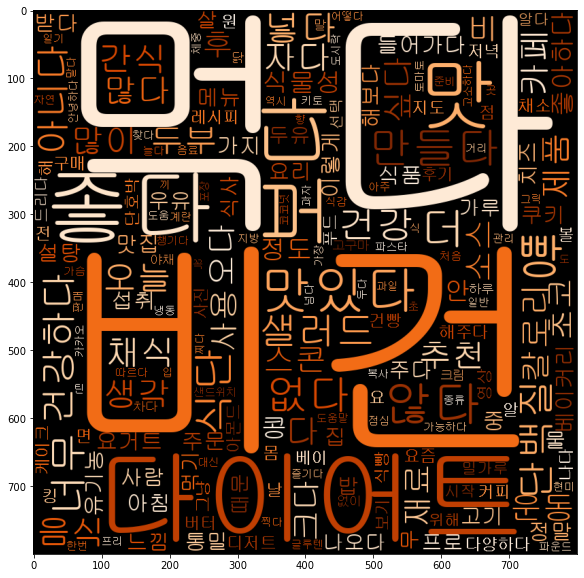

In [120]:
import matplotlib.pyplot as plt
#명사, 동사, 형용사, 부사로 워드클라우드
font_path = '본인 컴퓨터의 폰트 경로'
wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.show()

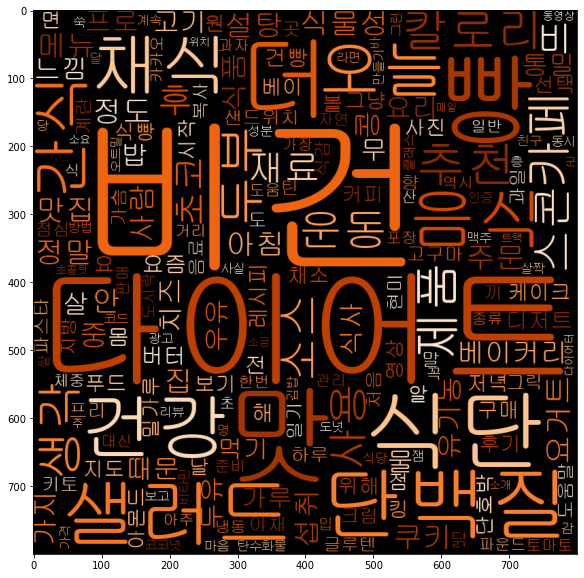

In [121]:
#명사로만 워드클라우드
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800, height=800, background_color='Black', colormap='Oranges', font_path = 'C:\Windows\Fonts\gulim.ttc')

from collections import Counter
count = Counter(text2)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize = (10, 10))
plt.imshow(wordclouds.to_array())
plt.show()

##### 군집분석 - Clustering(Actor 도출)

tf-idf

In [122]:
data3 = []
for i in data1:
    string = i[0]
    for w in i[1:]: #첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " " #단어 사이는 띄어쓰기로 연결
        string += w #(띄어쓰기 후 다음 단어) 써주기를 반복
    data3.append(string)
data3#쉼표를 기준으로 document가 구분됨(,)

['생활 결혼식 답례 품 후기 추천 꾸다 프리미엄 비건 쿠키 디저트 이안 위치 꾸다 결혼식 답례 품 후기 추천 꾸다 프리미엄 비건 디저트 결혼식 준비 고민 많다 특히 답례 품다 고민 많다 축하 마음 전달 해주다 께나 정성 답례 품 드리다 싶다 때문 기존 받다 보다 답례 품 떡 소금 수건 너무 흔하다 남 특별하다 고급 진걸 선물 싶다 고민 많이 꾸다 네이버 쇼핑 스마트 스토어 디저트 꾸준하다 프리미엄 비건 디저트 결론 꾸다 프리미엄 비건 디저트 결혼식 답례 품 선택 꾸다 비건 쿠키 선물 받다 처음 접 먹다 보고 맛있다 찾아보다 비건 놀래다 비건 왠지 풀 먹다 맛없다 생각 편견 아무튼 처음 선물 받다 때맛 좋다 디자인 이쁘다 기분 좋다 기억 답례 품 결정 주문 결혼식 답례 품 주문 답례 품 이렇게 이쁘다 포장 오다 문구 그림 직접 골 만들다 이쁘다 잘나오다 아주 만족 결혼식 답례 품 부모님 용 부모님 따로 답례 품 필요하다 추가 주문 받다 나누다 드리다 반응 어떻다 여쭈다 보다 다 좋아하다 부모님 만족하다 답례 품 나누다 드리다 기전 꽃다발 사진 한장 찍다 보다 왼쪽 사진 쿠키 가하다 상자 들어가다 주문 제작 쿠키 종류 여러가지 좋아하다 몇개 골 주문 예전 리뷰 용 찍다 두다 사진 애플 망고 패션 쿠키 초코 콩 포드 잼 쿠키 환상 조합 임 다이어트 항상 비건 이름 고급 지고 맛있다 죄책감 덜다 먹다 좋다 월넛 초코쿠키 헤이즐 초코 범벅 쿠키 다르다 모르다 먹다 고급 진걸 선호 편이 가격 이러하다 고급 짐 찾아보다 힘들다 사실 개인 초코 덕후 모든 답례 품 초코 범벅 베스트 메뉴인 월넛 초코 상자 주문 답례 품 용다 스토어 파다 팔다 다르다 크기 갯수 상담 조정 물다 직접 고르다 택 디자인 문구 너무 이쁘다 아직도 소장 상자 택 어떻다 보이다 직접 사진 찍다 보내다 적당하다 크기 깔끔하다 디자인 만족 결혼식 답례 품 후기 가지 꾸다 프리미엄 비건 디저트 도착 기쁘다 마음 고맙다 열심히 나누다 드리다 처음 보다 너무 포장 이쁘다 택 아기자기하다 좋다 이야기 쿠키 후 

In [123]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 

vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)

In [124]:
from collections import defaultdict
word2id = defaultdict(lambda:0) #value가 없는 key인 경우 error 대신 0을 출력

In [125]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature]=idx

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [126]:
tfidf=[]
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])

In [127]:
tfidf[4]

[('베지터블', 0.0778903320449533),
 ('토마토', 0.15956536920146344),
 ('스튜', 0.061981120797512494),
 ('송이버섯', 0.06954731997909121),
 ('양파', 0.12880372558911615),
 ('키', 0.0),
 ('당근', 0.12164770208045511),
 ('새다', 0.10288721902008444),
 ('리', 0.0),
 ('가지', 0.05233278173518414),
 ('채소', 0.1995949711031233),
 ('올리브오일', 0.16340560817120825),
 ('토마토', 0.15956536920146344),
 ('소스', 0.11544992101807411),
 ('맛있다', 0.06921034850638036),
 ('끓이다', 0.2941695138578253),
 ('은은하다', 0.0470175188275069),
 ('허브', 0.11264791742327135),
 ('향', 0.0),
 ('풍', 0.0),
 ('밉다', 0.038908231040045364),
 ('돋다', 0.06281154812293148),
 ('일체', 0.0657142764413617),
 ('조미료', 0.07115456018879357),
 ('없이', 0.029069119186022282),
 ('채소', 0.1995949711031233),
 ('맛', 0.0),
 ('내다', 0.14073177964313643),
 ('담백하다', 0.1233081907849607),
 ('깨끗하다', 0.05111382389068931),
 ('맛', 0.0),
 ('현미', 0.37675520801908835),
 ('밥', 0.0),
 ('제공', 0.09312652061689751),
 ('두유', 0.14780833839970509),
 ('들깨', 0.13625926728353274),
 ('버섯', 0.129301792332540

##### 토픽 개수 정하기

In [134]:
from gensim import corpora
from gensim import models
from gensim.models import LdaModel
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

In [135]:
#from gensim import corpora, models

dictionary = corpora.Dictionary(data1)
dictionary

In [136]:
#tuple로 mapping해주는 함수, doc2bow
#단어를 index로 mapping, 몇번 나왓는지 
corpus = [dictionary.doc2bow(text)for text in data1]

In [137]:
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 8),
  (12, 1),
  (13, 5),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 10),
  (35, 2),
  (36, 3),
  (37, 1),
  (38, 6),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 16),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 4),
  (55, 1),
  (56, 1),
  (57, 3),
  (58, 8),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 3),
  (72, 1),
  (73, 6),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 6),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 6),
  (91, 

In [141]:
import gensim
from gensim.models import CoherenceModel

In [144]:
#coherence 확인(군집 평가)

#coherenceModel_lda = CoherenceModel(model=lda, texts=data1, dictionary=dictionary, topn=10)
#coherence_model_lda.get_coherence()

In [142]:
values=[]
for i in range(2, 10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    #                           혼잡도 낮을수록 좋음
    values.append(ldamodel.log_perplexity(corpus))

Text(0, 0.5, 'Score')

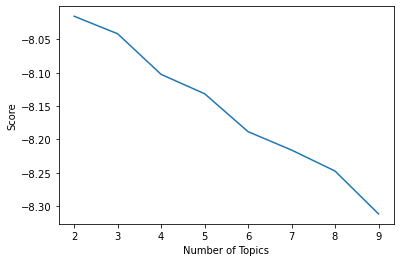

In [143]:
x = range(2, 10)
plt.plot(x, values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

In [145]:
from gensim.models import CoherenceModel
coherence_values = []
for i in range(2, 10):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i,id2word=dictionary)

    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data1, dictionary=dictionary, topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)




Text(0, 0.5, 'Score')

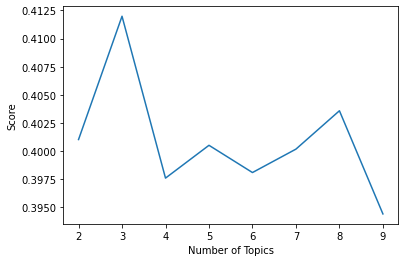

In [146]:
x=range(2,10)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

from gensim.models import CoherenceModel

coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus,
                                              num_topics=i,
                                              id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model=ldamodel,
                                        texts = data1,
                                        dictionary=dictionary,
                                        topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


##### 워드클라우드

In [147]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [148]:
sp_matrix1 = vectorizer.fit_transform(data3)

In [149]:
df1 = pd.DataFrame(sp_matrix1.toarray(), columns=vectorizer.get_feature_names())

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [150]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')

In [151]:
result = cluster.fit_predict(df1)

In [152]:
df_ward = data.copy()

In [153]:
df_ward['클러스터'] = list(result)

In [154]:
df_ward

,time,review,comment,like,url,doc,token,text_noun,클러스터
0,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737,생활 나의 결혼식 답례품 후기 및 추천 꾸디 프리미엄 비건 쿠키 디저트 이안 위...,"[생활, 결혼식, 답례, 품, 후기, 추천, 꾸다, 프리미엄, 비건, 쿠키, 디저트...","[생활, 결혼식, 답례, 품, 후기, 추천, 프리미엄, 비건, 쿠키, 디저트, 이안...",2
1,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869,일지 일차 맛있으면 안되는데 키메랩 생각보다 비건채식 맛있게 먹을 것이 정말 많...,"[일지, 일차, 맛있다, 안되다, 키메, 랩, 생각, 비건, 채식, 맛있다, 먹다,...","[일지, 일차, 키메, 랩, 생각, 비건, 채식, 정말, 한식, 전, 건선, 극단,...",2
2,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 나우티퍼피 위치스윗밸런스 교대역...,"[맛집, 멋지다, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, ...","[맛집, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, 퍼피, 위...",2
3,2022. 2. 14. 10:00,"맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식, ...",[],2,https://blog.naver.com/mom_say/222646546514,맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식 포만감과 비타민 가 풍부하여 ...,"[맘, 메이크, 선, 바쁘다, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민,...","[맘, 메이크, 선, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민, 내면, ...",0
4,2021. 9. 20. 17:56,"﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit...",[],5,https://blog.naver.com/givingtreems/222511615680,베지터블 토마토스튜 새송이버섯 양파 주키니 당근 샐러리 등 다섯가지 채소를 올리브...,"[베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 새다, 리, 가지, 채소...","[베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 리, 가지, 채소, 올리...",2
...,...,...,...,...,...,...,...,...,...
945,2021. 5. 6. 17:17,빵만먹고살고싶다 [마켓컬리빵]비건베이커리로 유명한 연남동...,[],[],https://blog.naver.com/jimin5077/222340294244,빵만먹고살고싶다 마켓컬리빵 비건베이커리로 유명한 연남동 빵어니스타 마켓컬리 주문 ...,"[빵, 먹고살다, 마켓, 컬리, 빵, 비건, 베이커리, 유명하다, 연남동, 빵, 스...","[빵, 마켓, 컬리, 빵, 비건, 베이커리, 연남동, 빵, 스타, 마켓, 컬리, 주...",1
946,2022. 4. 4. 23:02,일상 다이어트 식단기록 76 / 77일차 O리...,[],10,https://blog.naver.com/sj330035/222691733289,일상 다이어트 식단기록 일차 리 다이어트 일차 다이어트 식단기록 일차 아침 식단...,"[일상, 다이어트, 식단, 기록, 일차, 리, 다이어트, 일차, 다이어트, 식단, ...","[일상, 다이어트, 식단, 기록, 일차, 리, 다이어트, 일차, 다이어트, 식단, ...",1
947,2022. 4. 1. 11:39,업계 트랜드 분석 '22.4.1(금) F&B 뉴스 클리핑 ...,[],4,https://blog.naver.com/pulmuonefnc/222688754395,업계 트랜드 분석 금 뉴스 클리핑 푸드앤로그 삼성 압수수색 시작은 구내식당 일감...,"[업계, 트, 랜드, 분석, 금, 뉴스, 크다, 리핑, 푸드, 앤, 로그, 삼성, ...","[업계, 트, 랜드, 분석, 금, 뉴스, 리핑, 푸드, 앤, 로그, 삼성, 압수수색...",2
948,2021. 3. 6. 17:05,카페 거제카페추천 : 프릴메이 : 아주동카페 : 비건빵집 ...,[],8,https://blog.naver.com/h_yuri931017/222266408609,카페 거제카페추천 프릴메이 아주동카페 비건빵집 율로그 위치프릴메이 프릴메이 더보...,"[카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...","[카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...",1


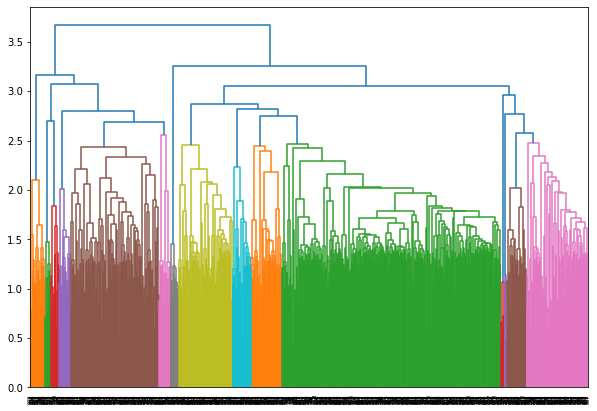

In [155]:
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(df1, method='ward'))

In [156]:
#파일 저장
import pickle
df_ward.to_pickle('직장인탐구생활_clustering.pkl')
df_ward.to_csv('직장인탐구생활_clustering.csv', encoding='utf-8-sig')